In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv('haberman.csv')
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


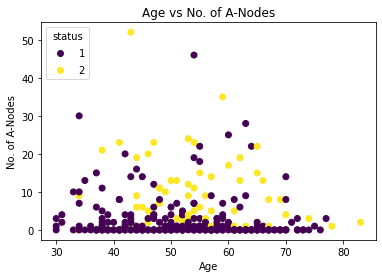

In [6]:
fig,ax= plt.subplots()
scatter=ax.scatter(df["age"], df["nodes"],c=df["status"])
legend1=ax.legend(*scatter.legend_elements(),loc="upper left", title="status")
plt.xlabel("Age")
plt.ylabel("No. of A-Nodes")
plt.title("Age vs No. of A-Nodes")

plt.show()

In [7]:
x= df[['age','nodes']]
y=df['status']

In [8]:
x.shape

(306, 2)

In [9]:
y.value_counts()

1    225
2     81
Name: status, dtype: int64

# Prediction without K-fold Cross validation 


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
len(x_train)

244

In [22]:
len(x_test)

62

In [23]:
x_train

,age,nodes
89,46,2
53,42,1
111,48,2
81,45,0
88,45,1
...,...,...
196,56,0
157,53,1
33,38,5
101,47,0


In [24]:
x_test

,age,nodes
218,59,1
160,53,24
11,34,10
120,49,1
232,61,0
...,...,...
282,69,0
210,58,1
148,52,0
235,61,8


In [25]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[48,  1],
       [11,  2]], dtype=int64)

In [26]:
print('Accuracy score: ', accuracy_score(y_test,y_pred))

Accuracy score:  0.8064516129032258


or we can predict the same by defining methods

In [34]:
def get_score(model, x_train, x_test ,y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)
get_score(LogisticRegression(), x_train, x_test, y_train,y_test)

0.8064516129032258

# Prediction with K fold cross validation 

In [27]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [28]:
i=1
for train_set,test_set in kf.split(X=x):
    print("fold ", i)
    print(train_set,"having:" , len(train_set) )
    print(test_set,"having:" , len(test_set) )
    print("--------------------------")
    i=i+1

fold  1
[ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305] h

In [32]:
scores_l =[]
# scores_l =[]
# for train_set, test_set in kf.split(X=x):
#     x_train, x_test, y_train, y_test = x[train_set], x[test_set], y[train_set], y[test_set]
#     print(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
from sklearn.model_selection import cross_val_score
scores_l= cross_val_score(LogisticRegression(), x, y)

In [30]:
print(scores_l)


[0.77419355 0.75409836 0.72131148 0.75409836 0.73770492]


In [31]:
print(np.mean(scores_l))

0.748281332628239
